In [1]:
# Importing packages to be used during project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\darra\\Desktop\\UCDPA_Darragh Claffey'

In [3]:
# Importing PGA Tour 2021 event data CSV

pga2021 = pd.read_csv('ASA All PGA Raw Data - Tourn Level.csv', index_col=False)
pga2021.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,9.0,2021,1,T9,0.16,-0.33,0.59,-0.11,0.15,0.31
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,9.0,2021,1,7,-0.18,-0.36,-0.18,1.03,0.49,0.31
2,B. Horschel,401243402,1651,280,270,72.0,69.2,76,9,22.0,...,9.0,2021,1,T9,0.45,-0.07,0.30,0.64,0.86,1.31
3,B. Koepka,401243402,6798,140,138,34.5,31.1,33,0,0.2,...,9.0,2021,1,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26
4,C. Conners,401243402,9126,280,278,62.5,56.1,61,0,7.2,...,9.0,2021,1,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69


In [4]:
pga2021.shape

(5688, 39)

In [5]:
# Importing Official World Golf Rankings ("OWGR") as at the end of the PGA Tour season

owgr = pd.read_csv('owgr_2021.csv', index_col=False)
owgr.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,EVENTS,AVG POINTS,TOTAL POINTS,POINTS LOST,POINTS GAINED,COUNTRY,OWGR
0,1,1.0,Jon Rahm,49,10.85,531.59,-278.15,340.59,NaN,1
1,2,2.0,Dustin Johnson,43,8.97,385.55,-268.61,147.35,NaN,2
2,3,3.0,Collin Morikawa,52,8.37,435.38,-159.25,315.33,NaN,3
3,4,4.0,Patrick Cantlay,43,7.60,326.91,-164.80,242.87,NaN,4
4,5,5.0,Xander Schauffele,48,7.60,364.75,-197.52,238.03,NaN,5


In [6]:
# Return a list of all column headings in the OWGR dataset

list(owgr.columns)

['RANK THIS WEEK',
 'RANK LAST WEEK',
 'PLAYER NAME',
 'EVENTS',
 'AVG POINTS',
 'TOTAL POINTS',
 'POINTS LOST',
 'POINTS GAINED',
 'COUNTRY',
 'OWGR']

In [7]:
# Dropping columns not required from the OWGR dataset
# Want to keep player names and their ranking

owgr2021 = owgr.drop(['RANK THIS WEEK',
 'RANK LAST WEEK',
 'EVENTS',
 'AVG POINTS',
 'TOTAL POINTS',
 'POINTS LOST',
 'POINTS GAINED',
 'COUNTRY'], axis=1)
owgr2021.head()

,PLAYER NAME,OWGR
0,Jon Rahm,1
1,Dustin Johnson,2
2,Collin Morikawa,3
3,Patrick Cantlay,4
4,Xander Schauffele,5


In [8]:
# Merging OWGR to the PGA Tour 2021 dataset

pga2021_owgr = pga2021.merge(owgr2021, left_on='player', right_on='PLAYER NAME', how='left')
pga2021_owgr.head(500)

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,1,T9,0.16,-0.33,0.59,-0.11,0.15,0.31,Abraham Ancer,12.0
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,1,7,-0.18,-0.36,-0.18,1.03,0.49,0.31,Bryson DeChambeau,7.0
2,B. Horschel,401243402,1651,280,270,72.0,69.2,76,9,22.0,...,1,T9,0.45,-0.07,0.30,0.64,0.86,1.31,Billy Horschel,28.0
3,B. Koepka,401243402,6798,140,138,34.5,31.1,33,0,0.2,...,1,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26,Brooks Koepka,10.0
4,C. Conners,401243402,9126,280,278,62.5,56.1,61,0,7.2,...,1,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69,Corey Conners,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,H. Lebioda,401243408,11387,142,138,39.5,36.3,35,0,5.8,...,0,WD,0.31,1.25,-0.19,0.12,1.18,1.49,Hank Lebioda,181.0
496,H. Mahan,401243408,957,142,144,27.0,22.2,26,0,1.2,...,0,CUT,-1.38,-0.73,-0.26,0.86,-0.13,-1.51,NaN,NaN
497,J. Bramlett,401243408,5902,284,283,59.5,54.0,59,3,8.2,...,0,T65,-1.51,-0.03,1.46,-0.27,1.17,-0.35,Joseph Bramlett,155.0
498,J. Byrd,401243408,508,284,278,61.5,59.3,71,3,11.2,...,0,T34,0.88,0.95,-0.93,0.00,0.02,0.90,Jonathan Byrd,902.0


In [9]:
pga2021_owgr.shape

(5688, 41)

In [10]:
# The OWGR dataset only included rankings up to 998 in the world but some of the golfers who played on the PGA Tour during 2021
# were outside the top 998 players in the world, leading to "NAN" being noted for a number of players in the "OWGR" column
# For example, Hunter Mahan was ranked ouside the top 1300 players in the world as at the end of the 2021 PGA Tour season,
# therefore his OWGR appears as "NaN"

print(pga2021_owgr.loc[[496]])

    Player_initial_last  tournament id  player id  hole_par  strokes  \
496            H. Mahan      401243408        957       142      144   

     hole_DKP  hole_FDP  hole_SDP  streak_DKP  streak_FDP  ...  no_cut  \
496      27.0      22.2        26           0         1.2  ...       0   

     Finish  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  sg_total  PLAYER NAME  \
496     CUT    -1.38   -0.73   -0.26    0.86   -0.13     -1.51          NaN   

     OWGR  
496   NaN  

[1 rows x 41 columns]


In [11]:
# Replace "NaN" in "OWGR" column with "Outside Top 998" using pandas

pga2021_owgr['OWGR'] = pga2021_owgr['OWGR'].fillna('Outside Top 998')
pga2021_owgr

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,1,T9,0.16,-0.33,0.59,-0.11,0.15,0.31,Abraham Ancer,12.0
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,1,7,-0.18,-0.36,-0.18,1.03,0.49,0.31,Bryson DeChambeau,7.0
2,B. Horschel,401243402,1651,280,270,72.0,69.2,76,9,22.0,...,1,T9,0.45,-0.07,0.30,0.64,0.86,1.31,Billy Horschel,28.0
3,B. Koepka,401243402,6798,140,138,34.5,31.1,33,0,0.2,...,1,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26,Brooks Koepka,10.0
4,C. Conners,401243402,9126,280,278,62.5,56.1,61,0,7.2,...,1,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69,Corey Conners,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,W. McGirt,401219793,3532,288,284,64.0,59.6,64,0,12.0,...,0,T67,-0.71,-0.62,0.32,0.14,-0.16,-0.86,NaN,Outside Top 998
5684,W. Roach,401219793,6185,144,141,35.0,31.9,34,0,6.0,...,0,CUT,-0.59,0.54,0.21,-0.31,0.44,-0.15,Wes Roach,634.0
5685,X. Zhang,401219793,4479,288,273,83.5,81.8,83,6,17.8,...,0,T14,0.44,-0.05,1.19,0.29,1.44,1.89,Xinjun Zhang,434.0
5686,Z. Blair,401219793,9040,144,140,34.0,32.8,36,3,6.8,...,0,CUT,0.02,0.16,0.13,0.03,0.33,0.35,Zac Blair,604.0


In [12]:
# Create dictionary containing players who played on 2021 Ryder Cup

rydercup_dict = {'player': ['Collin Morikawa', 'Dustin Johnson', 'Bryson DeChambeau', 'Brooks Koepka', 'Justin Thomas', 'Patrick Cantlay', 'Tony Finau', 'Xander Schauffele', 'Jordan Spieth', 'Harris English', 'Daniel Berger', 'Scottie Scheffler', 'Jon Rahm', 'Tommy Fleetwood', 'Tyrrell Hatton', 'Bernd Wiesberger', 'Rory McIlroy', 'Viktor Hovland', 'Paul Casey', 'Matt Fitzpatrick', 'Lee Westwood', 'Shane Lowry', 'Sergio Garcia', 'Ian Poulter'],
            'team': ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA',
                     'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe']}
print(rydercup_dict)

{'player': ['Collin Morikawa', 'Dustin Johnson', 'Bryson DeChambeau', 'Brooks Koepka', 'Justin Thomas', 'Patrick Cantlay', 'Tony Finau', 'Xander Schauffele', 'Jordan Spieth', 'Harris English', 'Daniel Berger', 'Scottie Scheffler', 'Jon Rahm', 'Tommy Fleetwood', 'Tyrrell Hatton', 'Bernd Wiesberger', 'Rory McIlroy', 'Viktor Hovland', 'Paul Casey', 'Matt Fitzpatrick', 'Lee Westwood', 'Shane Lowry', 'Sergio Garcia', 'Ian Poulter'], 'team': ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe']}


In [13]:
# Converting 2021 Ryder Cup dictionary to a Dataframe (in order to merge with PGA Tour dataset)

rc2021 = pd.DataFrame(rydercup_dict)
rc2021

,player,team
0,Collin Morikawa,USA
1,Dustin Johnson,USA
2,Bryson DeChambeau,USA
3,Brooks Koepka,USA
4,Justin Thomas,USA
5,Patrick Cantlay,USA
6,Tony Finau,USA
7,Xander Schauffele,USA
8,Jordan Spieth,USA
9,Harris English,USA


In [14]:
# Merging 2021 Ryder Cup team data into the PGA Tour 2021 dataset (which also includes OWGR data at this point)

pga2021_all = pga2021_owgr.merge(rc2021, left_on='player', right_on='player', how='left')
pga2021_all.head(20)

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR,team
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,T9,0.16,-0.33,0.59,-0.11,0.15,0.31,Abraham Ancer,12.0,NaN
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,7,-0.18,-0.36,-0.18,1.03,0.49,0.31,Bryson DeChambeau,7.0,USA
2,B. Horschel,401243402,1651,280,270,72.0,69.2,76,9,22.0,...,T9,0.45,-0.07,0.30,0.64,0.86,1.31,Billy Horschel,28.0,NaN
3,B. Koepka,401243402,6798,140,138,34.5,31.1,33,0,0.2,...,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26,Brooks Koepka,10.0,USA
4,C. Conners,401243402,9126,280,278,62.5,56.1,61,0,7.2,...,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69,Corey Conners,32.0,NaN
5,C. Morikawa,401243402,10592,280,283,55.5,45.4,55,0,7.2,...,T26,-1.12,-0.22,-0.22,-0.38,-0.82,-1.94,Collin Morikawa,3.0,USA
6,C. Smith,401243402,9131,280,278,63.0,55.6,62,0,1.4,...,T14,-0.10,0.00,-0.29,-0.30,-0.59,-0.69,Cameron Smith,23.0,NaN
7,D. Berger,401243402,9025,280,272,72.5,68.9,69,3,12.8,...,T11,-0.49,0.35,0.70,0.26,1.30,0.81,Daniel Berger,16.0,USA
8,D. Johnson,401243402,3448,280,272,74.0,68.6,72,5,12.4,...,8,2.37,-0.32,-0.64,-0.60,-1.56,0.81,Dustin Johnson,2.0,USA
9,E. van Rooyen,401243402,9364,280,277,67.5,58.8,63,3,13.2,...,T22,0.64,-0.33,-0.02,-0.73,-1.08,-0.44,Erik van Rooyen,53.0,NaN


In [15]:
pga2021_all.shape

(5688, 42)

In [16]:
# Not all players on the PGA Tour played on the Ryder Cup or were even eligible (Ryder Cup being USA versus Europe)
# For example, Bryson DeChambeau played on the Ryder Cup for the USA but Abraham Ancer was not eligible as he is from Mexico
# See "NaN" in "team" column for Abraham Ancer below

pga2021_all.head(2)

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR,team
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,T9,0.16,-0.33,0.59,-0.11,0.15,0.31,Abraham Ancer,12.0,NaN
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,7,-0.18,-0.36,-0.18,1.03,0.49,0.31,Bryson DeChambeau,7.0,USA


In [17]:
# Replace "NaN" for these ineligble golfers (or those who were eligible but did not make either the USA or European teams) with "Did not compete" using Numpy

pga2021_all['team'] = pga2021_all['team'].replace(np.nan, 'Did not compete')
pga2021_all

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR,team
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,T9,0.16,-0.33,0.59,-0.11,0.15,0.31,Abraham Ancer,12.0,Did not compete
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,7,-0.18,-0.36,-0.18,1.03,0.49,0.31,Bryson DeChambeau,7.0,USA
2,B. Horschel,401243402,1651,280,270,72.0,69.2,76,9,22.0,...,T9,0.45,-0.07,0.30,0.64,0.86,1.31,Billy Horschel,28.0,Did not compete
3,B. Koepka,401243402,6798,140,138,34.5,31.1,33,0,0.2,...,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26,Brooks Koepka,10.0,USA
4,C. Conners,401243402,9126,280,278,62.5,56.1,61,0,7.2,...,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69,Corey Conners,32.0,Did not compete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,W. McGirt,401219793,3532,288,284,64.0,59.6,64,0,12.0,...,T67,-0.71,-0.62,0.32,0.14,-0.16,-0.86,NaN,Outside Top 998,Did not compete
5684,W. Roach,401219793,6185,144,141,35.0,31.9,34,0,6.0,...,CUT,-0.59,0.54,0.21,-0.31,0.44,-0.15,Wes Roach,634.0,Did not compete
5685,X. Zhang,401219793,4479,288,273,83.5,81.8,83,6,17.8,...,T14,0.44,-0.05,1.19,0.29,1.44,1.89,Xinjun Zhang,434.0,Did not compete
5686,Z. Blair,401219793,9040,144,140,34.0,32.8,36,3,6.8,...,CUT,0.02,0.16,0.13,0.03,0.33,0.35,Zac Blair,604.0,Did not compete


In [18]:
# Checking datatypes of Strokes Gained columns (columns beginning with "sg")

pga2021_all.dtypes

Player_initial_last     object
tournament id            int64
player id                int64
hole_par                 int64
strokes                  int64
hole_DKP               float64
hole_FDP               float64
hole_SDP                 int64
streak_DKP               int64
streak_FDP             float64
streak_SDP               int64
n_rounds                 int64
made_cut                 int64
pos                    float64
finish_DKP               int64
finish_FDP               int64
finish_SDP               int64
total_DKP              float64
total_FDP              float64
total_SDP                int64
Var.20                   int64
player                  object
Unnamed: 2             float64
Unnamed: 3             float64
Unnamed: 4             float64
Var.25                   int64
tournament name         object
course                  object
date                    object
purse                  float64
season                   int64
no_cut                   int64
Finish  

In [19]:
# Strokes Gained columns are currently float64, due to including a mixture of numbers and characters (being "NA")
# "NA" is included here for two reasons: 
#    1) some events do not publish strokes gained data (Masters, Open Championship, etc.); and
#    2) when players miss the midway cut in an event, full strokes gained data cannot be calculated (calculated based on a full four round tournament)
# Therefore, will remove rows which correspond to missed cuts or correspond to tournaments which do not provide strokes gained data

pga2021_final = pga2021_all.dropna(subset=['sg_putt'])
pga2021_final

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR,team
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,T9,0.16,-0.33,0.59,-0.11,0.15,0.31,Abraham Ancer,12.0,Did not compete
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,7,-0.18,-0.36,-0.18,1.03,0.49,0.31,Bryson DeChambeau,7.0,USA
2,B. Horschel,401243402,1651,280,270,72.0,69.2,76,9,22.0,...,T9,0.45,-0.07,0.30,0.64,0.86,1.31,Billy Horschel,28.0,Did not compete
3,B. Koepka,401243402,6798,140,138,34.5,31.1,33,0,0.2,...,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26,Brooks Koepka,10.0,USA
4,C. Conners,401243402,9126,280,278,62.5,56.1,61,0,7.2,...,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69,Corey Conners,32.0,Did not compete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,W. McGirt,401219793,3532,288,284,64.0,59.6,64,0,12.0,...,T67,-0.71,-0.62,0.32,0.14,-0.16,-0.86,NaN,Outside Top 998,Did not compete
5684,W. Roach,401219793,6185,144,141,35.0,31.9,34,0,6.0,...,CUT,-0.59,0.54,0.21,-0.31,0.44,-0.15,Wes Roach,634.0,Did not compete
5685,X. Zhang,401219793,4479,288,273,83.5,81.8,83,6,17.8,...,T14,0.44,-0.05,1.19,0.29,1.44,1.89,Xinjun Zhang,434.0,Did not compete
5686,Z. Blair,401219793,9040,144,140,34.0,32.8,36,3,6.8,...,CUT,0.02,0.16,0.13,0.03,0.33,0.35,Zac Blair,604.0,Did not compete


In [20]:
# Using complete PGA Tour 2021 season data to create a dataframe including only data realting to players
# who won events on the PGA Tour during 2021 season

pga2021_winners = pga2021_final.loc[pga2021_final["Finish"] =='1']
pga2021_winners.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR,team
19,P. Cantlay,401243402,6007,280,269,74.0,72.3,76,8,12.4,...,1,-0.18,0.01,0.79,0.77,1.64,1.46,Patrick Cantlay,4.0,USA
77,P. Cantlay,401243403,6007,288,261,115.0,114.1,94,14,28.8,...,1,3.64,-0.27,0.28,0.30,0.31,3.95,Patrick Cantlay,4.0,USA
211,T. Finau,401243404,2230,284,264,94.5,93.7,89,14,19.4,...,1,1.00,0.28,1.26,1.16,2.70,3.70,Tony Finau,9.0,USA
297,K. Kisner,401243405,2552,280,265,85.5,83.8,79,14,20.6,...,1,1.10,0.30,0.96,0.20,1.47,2.56,Kevin Kisner,35.0,Did not compete
375,A. Ancer,401243407,9261,280,264,82.0,82.0,84,11,20.0,...,1,0.89,0.71,1.10,0.34,2.16,3.05,Abraham Ancer,12.0,Did not compete


In [21]:
pga2021_winners.shape

(38, 42)

In [22]:
# Dropping columns which are not revelent when reviewing Strokes Gained stats

pga2021_winners_sg = pga2021_winners.drop(pga2021_winners.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24]], axis = 1)
pga2021_winners_sg.head()

,player,Var.25,tournament name,course,date,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR,team
19,Patrick Cantlay,9,Tour Championship,"East Lake Golf Club - Atlanta, GA",05/09/2021,9.0,2021,1,1,-0.18,0.01,0.79,0.77,1.64,1.46,Patrick Cantlay,4.0,USA
77,Patrick Cantlay,10,BMW Championship,"Caves Valley Golf Club - Baltimore, MD",29/08/2021,9.5,2021,1,1,3.64,-0.27,0.28,0.30,0.31,3.95,Patrick Cantlay,4.0,USA
211,Tony Finau,11,Northern Trust Open,"Liberty National - Jersey City, NJ",23/08/2021,9.5,2021,1,1,1.00,0.28,1.26,1.16,2.70,3.70,Tony Finau,9.0,USA
297,Kevin Kisner,12,Wyndham Championship,"Sedgefield Country Club - Greensboro, NC",15/08/2021,6.4,2021,0,1,1.10,0.30,0.96,0.20,1.47,2.56,Kevin Kisner,35.0,Did not compete
375,Abraham Ancer,13,WGC-FedEx St. Jude Classic,"TPC Southwind - Memphis, TN",08/08/2021,10.5,2021,1,1,0.89,0.71,1.10,0.34,2.16,3.05,Abraham Ancer,12.0,Did not compete


In [23]:
# Total Strokes Gained ("sg_total") is the sum of:
#   1) Strokes Gained Putting ("sg_putt"); and
#   2) Strokes Gained Tee to Green ("sg_t2g")
# Using iterrows to add new columns which calculate the breakdown of Total Strokes Gained between Strokes Gained Putting
# and Strokes Gained Tee to Green

for label, row in pga2021_winners_sg.iterrows():
    pga2021_winners_sg.loc[label,'sg_putt_perc'] = round(row['sg_putt']/row['sg_total'] * 100,2)
    pga2021_winners_sg.loc[label,'sg_t2g_perc'] = round(row['sg_t2g']/row['sg_total'] * 100,2)
pga2021_winners_sg.head(2)

,player,Var.25,tournament name,course,date,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR,team,sg_putt_perc,sg_t2g_perc
19,Patrick Cantlay,9,Tour Championship,"East Lake Golf Club - Atlanta, GA",05/09/2021,9.0,2021,1,1,-0.18,0.01,0.79,0.77,1.64,1.46,Patrick Cantlay,4.0,USA,-12.33,112.33
77,Patrick Cantlay,10,BMW Championship,"Caves Valley Golf Club - Baltimore, MD",29/08/2021,9.5,2021,1,1,3.64,-0.27,0.28,0.30,0.31,3.95,Patrick Cantlay,4.0,USA,92.15,7.85


In [24]:
pga2021_winners_sg.shape

(38, 20)

In [25]:
# Re-order columns to make it easier to view the Strokes Gained stats

pga2021_winners_sg = pga2021_winners_sg[['player', 'Finish', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'sg_putt_perc', 'sg_t2g_perc', 'OWGR', 'team', 'tournament name', 'course', 'date', 'purse', 'season', 'no_cut', 'Var.25', 'PLAYER NAME']]
pga2021_winners_sg.head(2)

,player,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,sg_putt_perc,sg_t2g_perc,OWGR,team,tournament name,course,date,purse,season,no_cut,Var.25,PLAYER NAME
19,Patrick Cantlay,1,-0.18,0.01,0.79,0.77,1.64,1.46,-12.33,112.33,4.0,USA,Tour Championship,"East Lake Golf Club - Atlanta, GA",05/09/2021,9.0,2021,1,9,Patrick Cantlay
77,Patrick Cantlay,1,3.64,-0.27,0.28,0.30,0.31,3.95,92.15,7.85,4.0,USA,BMW Championship,"Caves Valley Golf Club - Baltimore, MD",29/08/2021,9.5,2021,1,10,Patrick Cantlay


In [26]:
# Using players names as the index and sorting by OWGR (in order of highest ranked player to lowest ranked player)

pga2021_winners_sg.set_index('player').sort_values('OWGR')

,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,sg_putt_perc,sg_t2g_perc,OWGR,team,tournament name,course,date,purse,season,no_cut,Var.25,PLAYER NAME
player,,,,,,,,,,,,,,,,,,,
Jon Rahm,1,0.91,0.57,1.25,1.06,2.87,3.78,24.07,75.93,1.0,Europe,U.S. Open,"Torrey Pines South - La Jolla, CA",20/06/2021,12.50,2021,0,20,Jon Rahm
Collin Morikawa,1,0.99,0.17,2.39,0.57,3.13,4.12,24.03,75.97,3.0,USA,WGC-Workday Championship,"The Concession Golf Club - Bradenton, FL",28/02/2021,10.50,2021,1,36,Collin Morikawa
Patrick Cantlay,1,-0.18,0.01,0.79,0.77,1.64,1.46,-12.33,112.33,4.0,USA,Tour Championship,"East Lake Golf Club - Atlanta, GA",05/09/2021,9.00,2021,1,9,Patrick Cantlay
Patrick Cantlay,1,3.64,-0.27,0.28,0.30,0.31,3.95,92.15,7.85,4.0,USA,BMW Championship,"Caves Valley Golf Club - Baltimore, MD",29/08/2021,9.50,2021,1,10,Patrick Cantlay
Patrick Cantlay,1,0.93,0.56,1.02,0.50,2.08,3.01,30.90,69.10,4.0,USA,The ZOZO Championship,"Sherwood CC - Thousand Oaks, CA",25/10/2020,8.00,2021,1,49,Patrick Cantlay
Patrick Cantlay,1,0.71,1.13,1.52,0.92,3.57,4.28,16.59,83.41,4.0,USA,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",06/06/2021,9.30,2021,0,22,Patrick Cantlay
Justin Thomas,1,0.41,0.75,1.60,0.86,3.22,3.63,11.29,88.71,6.0,USA,The Players Championship,"TPC Sawgrass - Ponte Vedra Beach, FL",14/03/2021,15.00,2021,0,33,Justin Thomas
Bryson DeChambeau,1,0.69,0.29,1.06,1.76,3.11,3.80,18.16,81.84,7.0,USA,Arnold Palmer Invitational,"Bay Hill - Orlando, FL",07/03/2021,9.30,2021,0,34,Bryson DeChambeau
Bryson DeChambeau,1,1.09,1.24,1.90,1.33,4.48,5.57,19.57,80.43,7.0,USA,U.S. Open,"Winged Foot GC - Mamaroneck, NY",20/09/2020,12.50,2021,0,54,Bryson DeChambeau


In [27]:
pga2021_winners_sg.dtypes

player              object
Finish              object
sg_putt            float64
sg_arg             float64
sg_app             float64
sg_ott             float64
sg_t2g             float64
sg_total           float64
sg_putt_perc       float64
sg_t2g_perc        float64
OWGR                object
team                object
tournament name     object
course              object
date                object
purse              float64
season               int64
no_cut               int64
Var.25               int64
PLAYER NAME         object
dtype: object

In [28]:
# Calculating the mean Strokes Gained Putting percentage (of Total Strokes Gained) and Strokes Gained Tee to Green percentage (of Total Strokes Gained)
# of all winners in the 2021 season

pga2021_winners_sg_mean = round(pga2021_winners_sg[['sg_putt_perc', 'sg_t2g_perc']].mean(),2)
pga2021_winners_sg_mean

sg_putt_perc    31.67
sg_t2g_perc     68.32
dtype: float64

In [29]:
arr = pga2021_winners_sg['player'].to_numpy()
arr

array(['Patrick Cantlay', 'Patrick Cantlay', 'Tony Finau', 'Kevin Kisner',
       'Abraham Ancer', 'Cameron Champ', 'Seamus Power', 'Lucas Glover',
       'Cameron Davis', 'Harris English', 'Jon Rahm', 'Garrick Higgo',
       'Patrick Cantlay', 'Jason Kokrak', 'Phil Mickelson',
       'Kyoung-Hoon Lee', 'Rory McIlroy', 'Stewart Cink', 'Jordan Spieth',
       'Matt Jones', 'Justin Thomas', 'Bryson DeChambeau',
       'Collin Morikawa', 'Max Homa', 'Daniel Berger', 'Brooks Koepka',
       'Patrick Reed', 'Si Woo Kim', 'Kevin Na', 'Harris English',
       'Robert Streb', 'Carlos Ortiz', 'Patrick Cantlay', 'Jason Kokrak',
       'Martin Laird', 'Sergio Garcia', 'Bryson DeChambeau',
       'Stewart Cink'], dtype=object)

In [30]:
# Custom function to check if a certain player won during 2021 on the PGA Tour

def did_player_win(a):
    if a in arr:
        print (a + ': '+ 'Winner Winner Chicken Dinner')
    else:
        print (a + ': '+ 'Did not win on the PGA Tour in 2021')

did_player_win('Tiger Woods')
did_player_win('Patrick Cantlay')

Tiger Woods: Did not win on the PGA Tour in 2021
Patrick Cantlay: Winner Winner Chicken Dinner


In [31]:
# Count number of wins by player and sort in order of most wins to fewest

pga2021_winners_sg.groupby(['player']).count()['Finish'].sort_values(ascending=False)

player
Patrick Cantlay      4
Jason Kokrak         2
Bryson DeChambeau    2
Stewart Cink         2
Harris English       2
Abraham Ancer        1
Matt Jones           1
Max Homa             1
Patrick Reed         1
Phil Mickelson       1
Robert Streb         1
Lucas Glover         1
Rory McIlroy         1
Seamus Power         1
Sergio Garcia        1
Si Woo Kim           1
Martin Laird         1
Kevin Na             1
Kyoung-Hoon Lee      1
Brooks Koepka        1
Kevin Kisner         1
Justin Thomas        1
Jordan Spieth        1
Jon Rahm             1
Garrick Higgo        1
Daniel Berger        1
Collin Morikawa      1
Carlos Ortiz         1
Cameron Davis        1
Cameron Champ        1
Tony Finau           1
Name: Finish, dtype: int64

In [32]:
# RESULTS / INSIGHTS

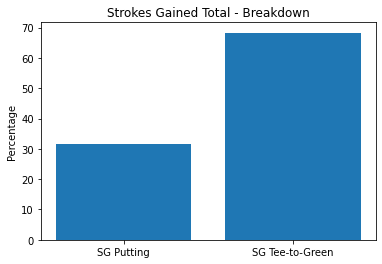

In [33]:
# 1. Breakdown of SG Total between SG Putting & SG Tee to Green

plt.bar(pga2021_winners_sg_mean.index, pga2021_winners_sg_mean.values)
plt.title('Strokes Gained Total - Breakdown')
plt.ylabel('Percentage')
LABELS = ['SG Putting', 'SG Tee-to-Green']
plt.xticks(pga2021_winners_sg_mean.index, LABELS)
plt.show()

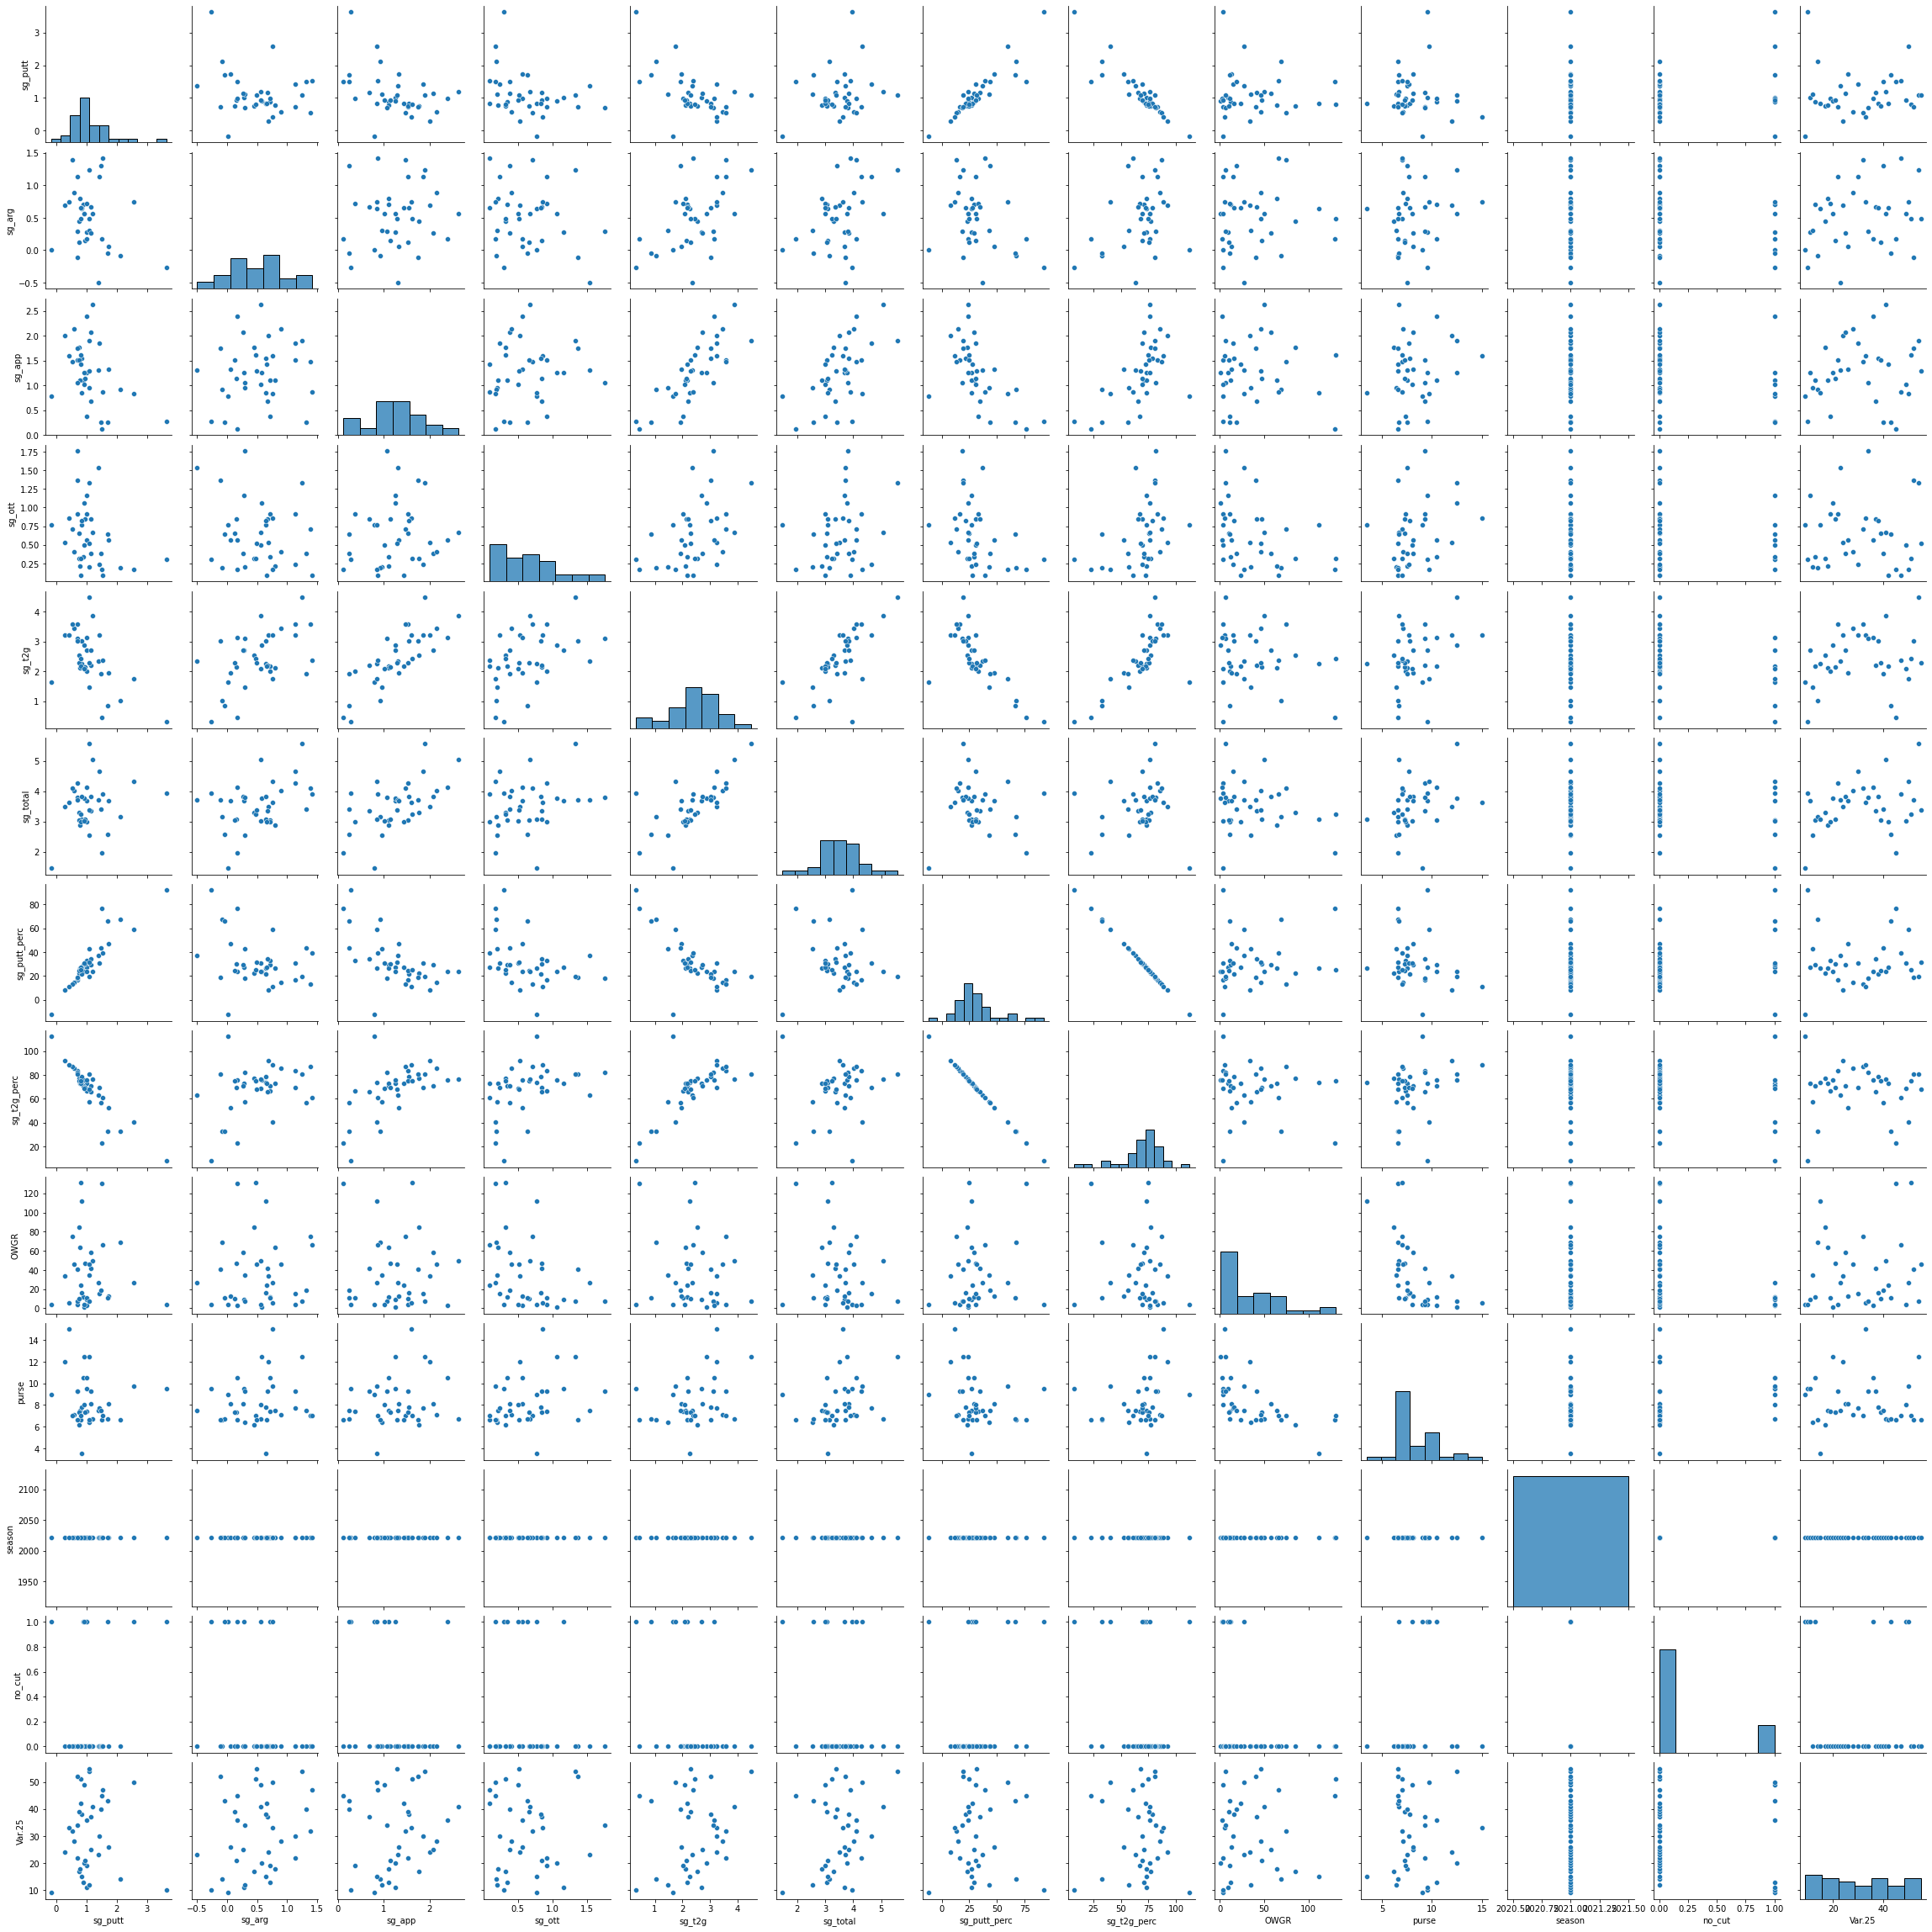

In [34]:
sns.pairplot(pga2021_winners_sg)

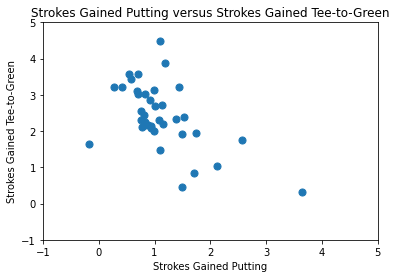

In [35]:
# 2. PGA Tour winner's Strokes Gained Tee-to-Green per round plotted against their Strokes Gained Putting per round

plt.scatter(pga2021_winners_sg['sg_putt'], pga2021_winners_sg['sg_t2g'], s=50)
plt.title('Strokes Gained Putting versus Strokes Gained Tee-to-Green')
plt.ylabel('Strokes Gained Tee-to-Green')
plt.xlabel('Strokes Gained Putting')
plt.ylim(-1, 5)
plt.xlim(-1, 5)
plt.show()

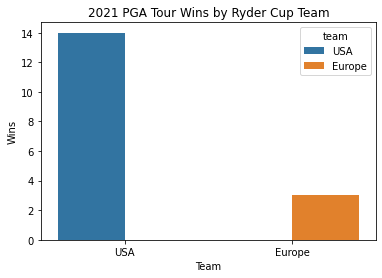

In [36]:
# 3. Ryder Cup player wins on PGA Tour in 2021 (pre-Ryder Cup)

sns.countplot(data=pga2021_winners_sg[-(pga2021_winners_sg.team == 'Did not compete')],x='team', hue='team')
plt.title('2021 PGA Tour Wins by Ryder Cup Team')
plt.ylabel('Wins')
plt.xlabel('Team')
plt.show()

In [37]:
# 4. Ryder Cup player wins on PGA Tour in 2021 (pre-Ryder Cup)

# 4a) Create new dataframe using full PGA Tour dataset (winners and non-winners, OWGR, Ryder Cup) and dropping rows where errors appear in the Ryder Cup team ('team') column 

RC1 = pga2021_all.dropna(subset=['team'])
RC1.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,PLAYER NAME,OWGR,team
0,A. Ancer,401243402,9261,280,274,63.0,60.4,70,3,11.0,...,T9,0.16,-0.33,0.59,-0.11,0.15,0.31,Abraham Ancer,12.0,Did not compete
1,B. DeChambeau,401243402,10046,280,274,70.5,65.9,65,3,18.4,...,7,-0.18,-0.36,-0.18,1.03,0.49,0.31,Bryson DeChambeau,7.0,USA
2,B. Horschel,401243402,1651,280,270,72.0,69.2,76,9,22.0,...,T9,0.45,-0.07,0.30,0.64,0.86,1.31,Billy Horschel,28.0,Did not compete
3,B. Koepka,401243402,6798,140,138,34.5,31.1,33,0,0.2,...,WD,0.21,-0.21,-0.85,0.59,-0.47,-0.26,Brooks Koepka,10.0,USA
4,C. Conners,401243402,9126,280,278,62.5,56.1,61,0,7.2,...,T22,-0.21,-1.49,0.37,0.64,-0.48,-0.69,Corey Conners,32.0,Did not compete


In [38]:
# 4b) Drop players who did not play in the Ryder Cup

RC2 = RC1.drop(RC1[RC1.team == 'Did not compete'].index)

In [39]:
# 4c) Changing data in OWGR column to float (from object)

RC2['OWGR'] = RC2['OWGR'].astype(float)

In [40]:
# 4c) Creating a series with the average OWGR of both Ryder Cup teams (and those who did not play, will be remove in step 3d)

Ryder_Cup_OWGR = RC2.groupby(['team']).mean()['OWGR'].sort_values(ascending=False)
Ryder_Cup_OWGR

team
Europe    28.578431
USA        9.473684
Name: OWGR, dtype: float64

C:\Users\darra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


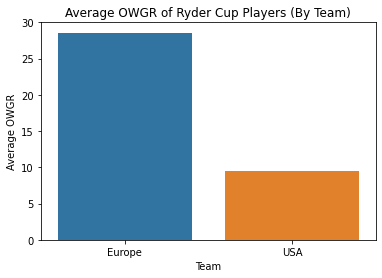

In [41]:
# 4d) Final step, use Seaborn to create a barplot of this series (average OWGR of both Ryder Cup teams)

sns.barplot(Ryder_Cup_OWGR.index, Ryder_Cup_OWGR.values)
plt.title('Average OWGR of Ryder Cup Players (By Team)')
plt.ylabel('Average OWGR')
plt.xlabel('Team')
plt.show()

In [42]:
# End